$$ \huge \textsf{Assignment-4 : KNN Algorithm} $$ 

$$ \LARGE \textsf{Machine Learning - AM 623} $$  

$$ \normalsize \texttt{Abhimanyu Singh (21-06-03)} $$  

# Assignment 4 : KNN Algorithm using K = 1,3,5 (Euclidean Distance)

---

## Import Libraries and Data

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False

In [358]:
df = pd.read_csv('iris.csv')

In [359]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [360]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


> All data is non-null so no need of data preprocessing

In [362]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Preprocessing

In [363]:
# df.loc["LABEL OF ROW"]

In [364]:
#Extracting Independent and dependent Variable  
x = df.iloc[:, 0:4].values  # Selcts Features from 0th-col to 3rd-col (Excludes 4th-col)
y = df.iloc[:, -1].values   # Selcts Result from last column i.e., -1-th col

In [365]:
x.shape

(150, 4)

In [366]:
y.shape

(150,)

In [367]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0) 

In [368]:
print(f'Training set size:\t {x_train.shape[0]} samples \nTest set size:\t\t {x_test.shape[0]} samples')

Training set size:	 105 samples 
Test set size:		 45 samples


In [369]:
#Normalize the Dataset
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [370]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]]

x train after Normalization
[[0.76923077 0.30769231 0.53846154 0.15384615]
 [0.70610474 0.3258945  0.59747324 0.1955367 ]
 [0.68914871 0.33943145 0.58629069 0.25714504]
 [0.72712585 0.26661281 0.60593821 0.18178146]
 [0.71414125 0.26647062 0.61821183 0.19185884]]


## Visualize the Dataset before and after Normalization

In [371]:
#columns in Dataframe
df.columns.values

array(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'], dtype=object)

In [372]:
# CReating a Normalized Dataframe
# np.c_ is the numpy concatenate function
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],columns = df.columns.values)
iris_df_2

,sepal.length,sepal.width,petal.length,petal.width,variety
0,0.769231,0.307692,0.538462,0.153846,Versicolor
1,0.706105,0.325894,0.597473,0.195537,Virginica
2,0.689149,0.339431,0.586291,0.257145,Virginica
3,0.727126,0.266613,0.605938,0.181781,Virginica
4,0.714141,0.266471,0.618212,0.191859,Virginica
...,...,...,...,...,...
100,0.818031,0.51753,0.250418,0.016695,Setosa
101,0.692768,0.318893,0.615794,0.197934,Virginica
102,0.756765,0.352287,0.534955,0.130477,Versicolor
103,0.692991,0.341996,0.602992,0.197997,Virginica


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

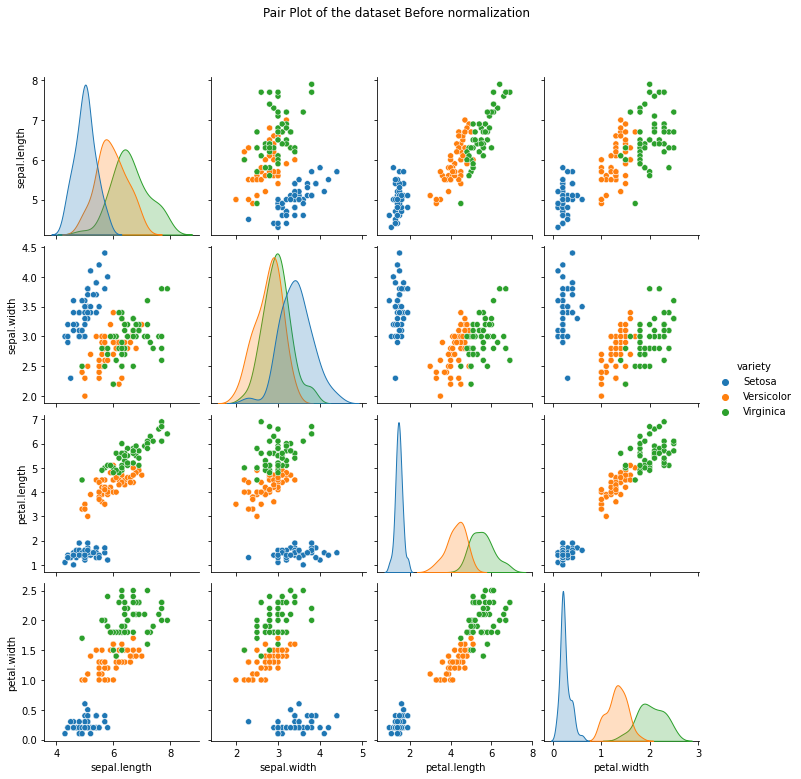

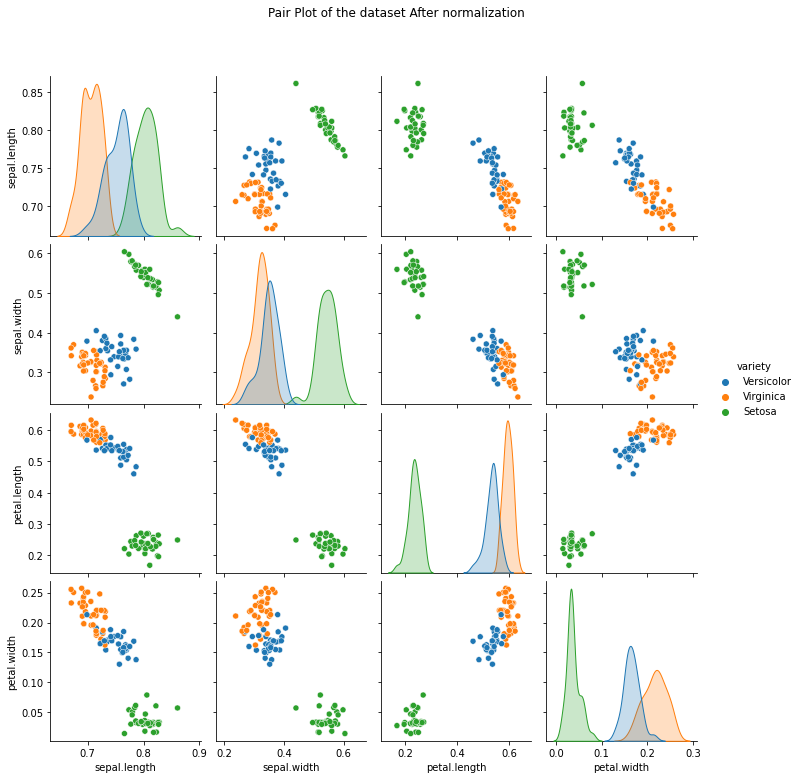

In [373]:
#relationships between variables; color code by species type
before= sns.pairplot(df,hue='variety')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

## After
after= sns.pairplot(iris_df_2, hue= 'variety')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

## Model Fitting : KNN using Euclidean Distance

In [374]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  

#Classifiers with k =1,3,5

classifier1= KNeighborsClassifier(n_neighbors=1, metric='euclidean', p=2 )  
classifier1.fit(x_train, y_train)  

classifier2= KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=2 )  
classifier2.fit(x_train, y_train)  

classifier3= KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2 )  
classifier3.fit(x_train, y_train)  

KNeighborsClassifier(metric='euclidean')

In [375]:
#Predicting the test set result  
y_pred1= classifier1.predict(x_test)
y_pred2= classifier2.predict(x_test) 
y_pred3= classifier3.predict(x_test) 

## Performance Metrices and Accuracy

In [376]:
from sklearn.metrics import accuracy_score
print(f'The accuracy of KNN using k=1 is {accuracy_score(y_test, y_pred1)*100} %')
print(f'The accuracy of KNN using k=3 is {accuracy_score(y_test, y_pred2)*100} %')
print(f'The accuracy of KNN using k=5 is {accuracy_score(y_test, y_pred3)*100} %')

The accuracy of KNN using k=1 is 97.77777777777777 %
The accuracy of KNN using k=3 is 97.77777777777777 %
The accuracy of KNN using k=5 is 97.77777777777777 %


In [389]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  

cm1 = confusion_matrix(y_test, y_pred1) 
print(f"Confusin Matrix for k=1:\n {cm1}")

cm2 = confusion_matrix(y_test, y_pred2) 
print(f"Confusin Matrix for k=1:\n {cm2}")

cm3 = confusion_matrix(y_test, y_pred3) 
print(f"Confusin Matrix for k=1:\n {cm3}")

Confusin Matrix for k=1:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Confusin Matrix for k=1:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Confusin Matrix for k=1:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [390]:
labels_names = ['True Versicolor','False Virginica','False Setosa', 'False Versicolor','True Virginica','False Setosa', 'False Versicolor','False Virginica','True Setosa']
labels_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
labels_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1} \n {v2} \n {v3}" for v1, v2, v3 in zip(labels_names,labels_counts,labels_percentages)]
labels = np.asarray(labels).reshape(3,3)

labels

array([['True Versicolor \n 13 \n 34.21%',
        'False Virginica \n 0 \n 0.00%', 'False Setosa \n 0 \n 0.00%'],
       ['False Versicolor \n 0 \n 0.00%',
        'True Virginica \n 15 \n 39.47%', 'False Setosa \n 1 \n 2.63%'],
       ['False Versicolor \n 0 \n 0.00%',
        'False Virginica \n 0 \n 0.00%', 'True Setosa \n 9 \n 23.68%']],
      dtype='<U29')

In [391]:
xtick_labels = ['Versicolor','Virginica','Setosa']

[Text(0.5, 1.0, 'Confusion Matrix for KNN with K=1')]

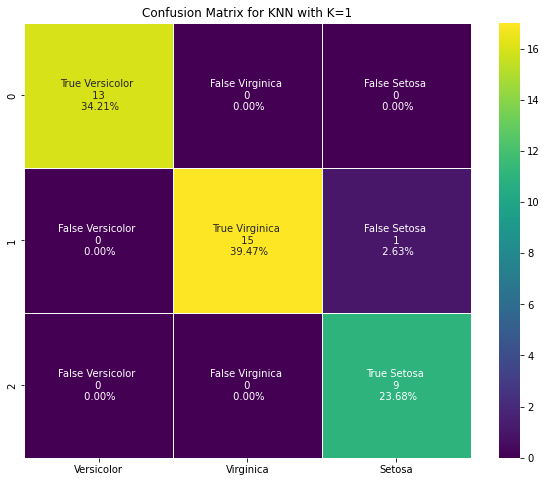

In [392]:
plt.figure(figsize=(10,8)) 
sns.heatmap(cm1, annot=labels,xticklabels = xtick_labels, fmt='',cmap = 'viridis',linewidths=0.5).set(title='Confusion Matrix for KNN with K=1')

[Text(0.5, 1.0, 'Confusion Matrix for KNN with K=2')]

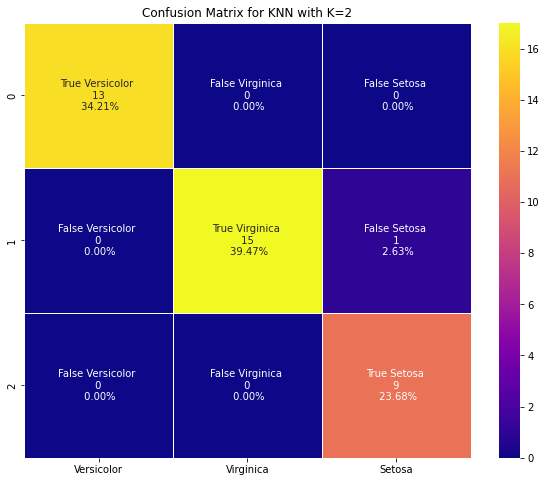

In [393]:
plt.figure(figsize=(10,8)) 
sns.heatmap(cm2, annot=labels,xticklabels = xtick_labels, fmt='',cmap = 'plasma',linewidths=0.5).set(title='Confusion Matrix for KNN with K=2')

[Text(0.5, 1.0, 'Confusion Matrix for KNN with K=3')]

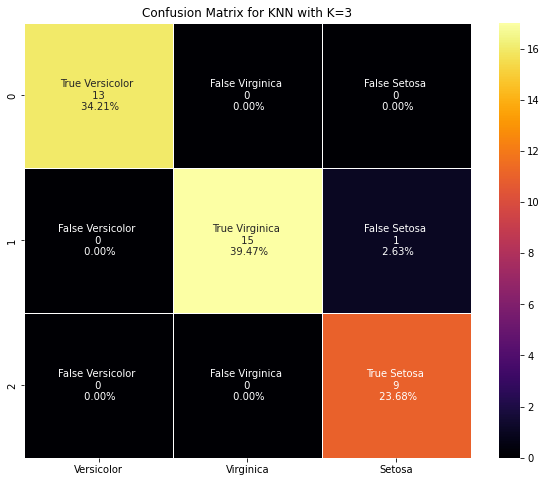

In [394]:
plt.figure(figsize=(10,8)) 
sns.heatmap(cm3,annot=labels,xticklabels = xtick_labels, fmt='',cmap = 'inferno',linewidths=0.5).set(title='Confusion Matrix for KNN with K=3')